In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('/content/UPI payment fraud detection.csv')

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,151799.000000,1.517990e+05,1.517990e+05,1.517980e+05,1.517980e+05,1.517980e+05,151798.000000,151798.0
mean,9.333902,1.791774e+05,8.879109e+05,9.043402e+05,9.137641e+05,1.180076e+06,0.000863,0.0
std,1.906281,3.401606e+05,2.807531e+06,2.844268e+06,2.384389e+06,2.705635e+06,0.029364,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.111398e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.122687e+04,1.999000e+04,0.000000e+00,3.164400e+04,9.332977e+04,0.000000,0.0
75%,11.000000,2.230398e+05,1.956685e+05,2.262719e+05,6.869059e+05,1.120989e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
fl = (data.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


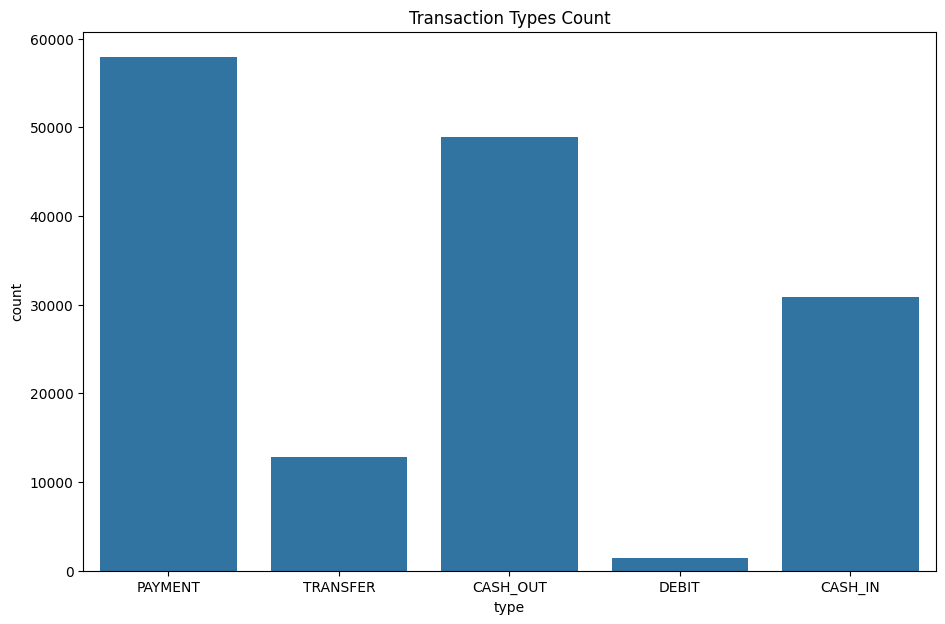

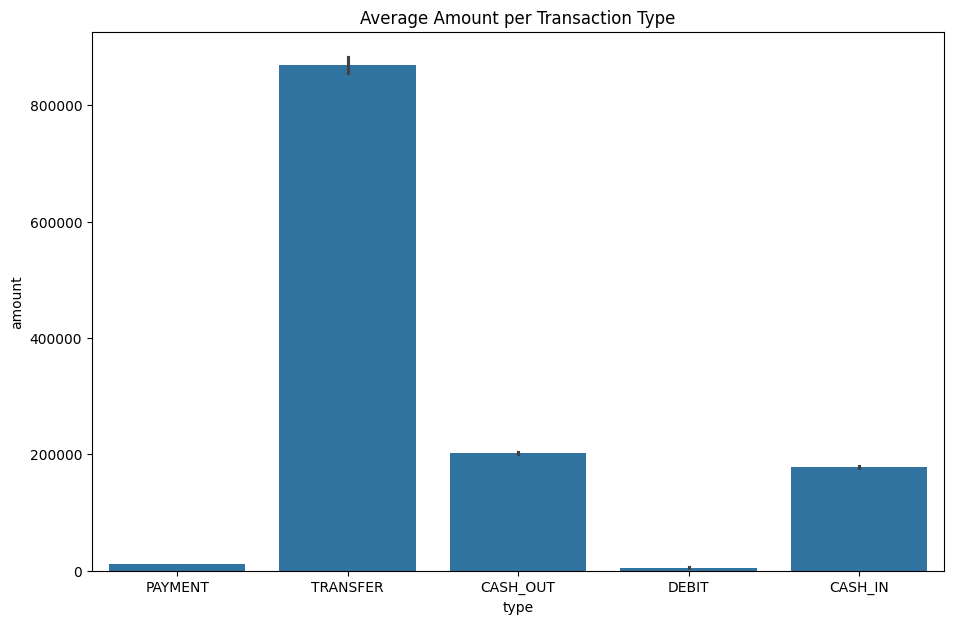

In [6]:
# Plotting distributions and relationships in the dataset
plt.figure(figsize=(11, 7))
sns.countplot(x='type', data=data)
plt.title('Transaction Types Count')
plt.show()

plt.figure(figsize=(11, 7))
sns.barplot(x='type', y='amount', data=data)
plt.title('Average Amount per Transaction Type')
plt.show()

In [7]:
print(data['isFraud'].value_counts())

isFraud
0.0    151667
1.0       131
Name: count, dtype: int64


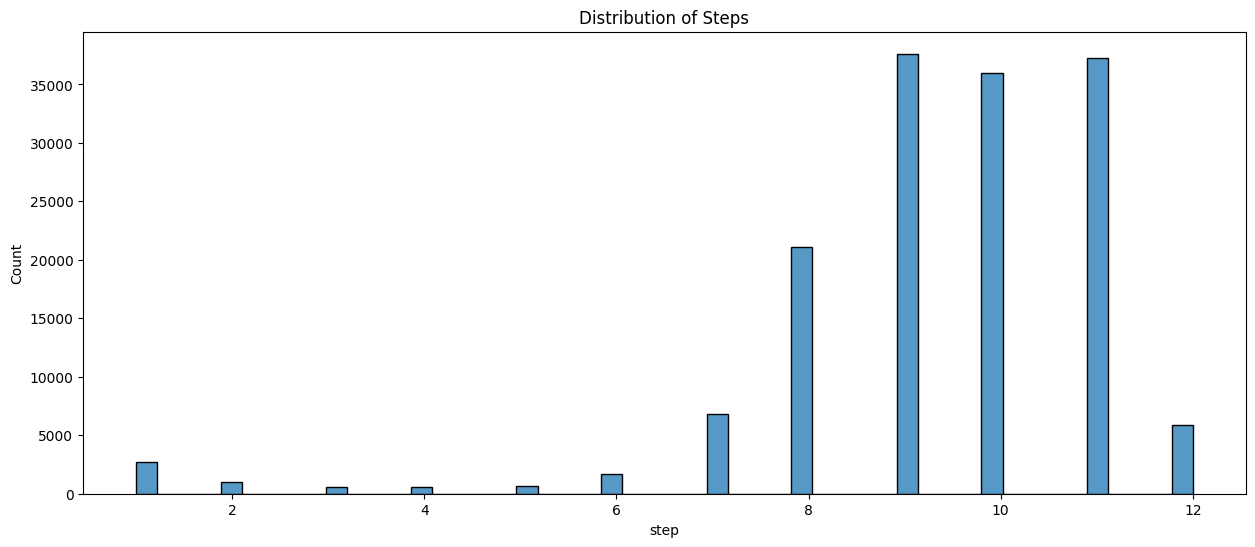

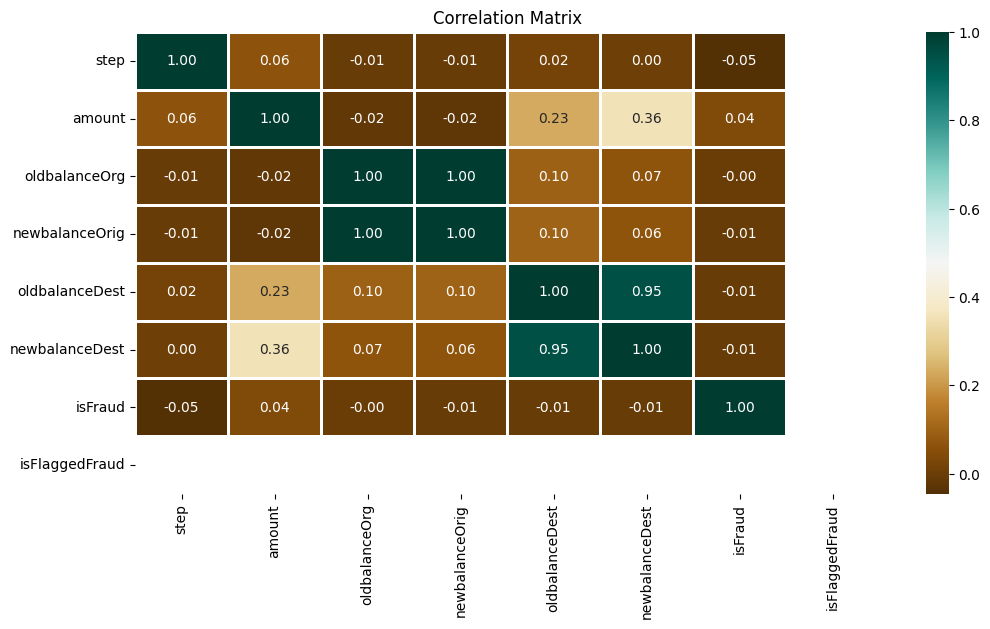

In [8]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50)
plt.title('Distribution of Steps')
plt.show()

plt.figure(figsize=(12, 6))
numeric_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numeric_cols].corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Matrix')
plt.show()

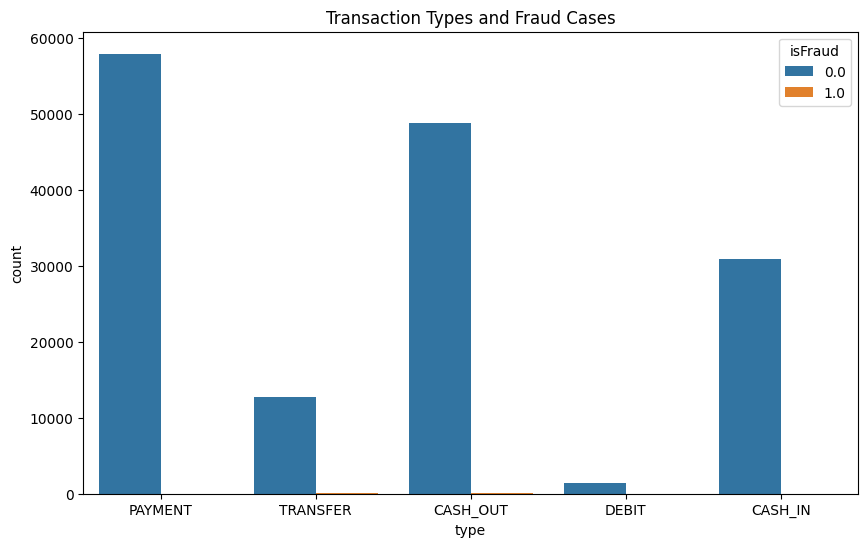

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=data)
plt.title('Transaction Types and Fraud Cases')
plt.show()

<ipython-input-18-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

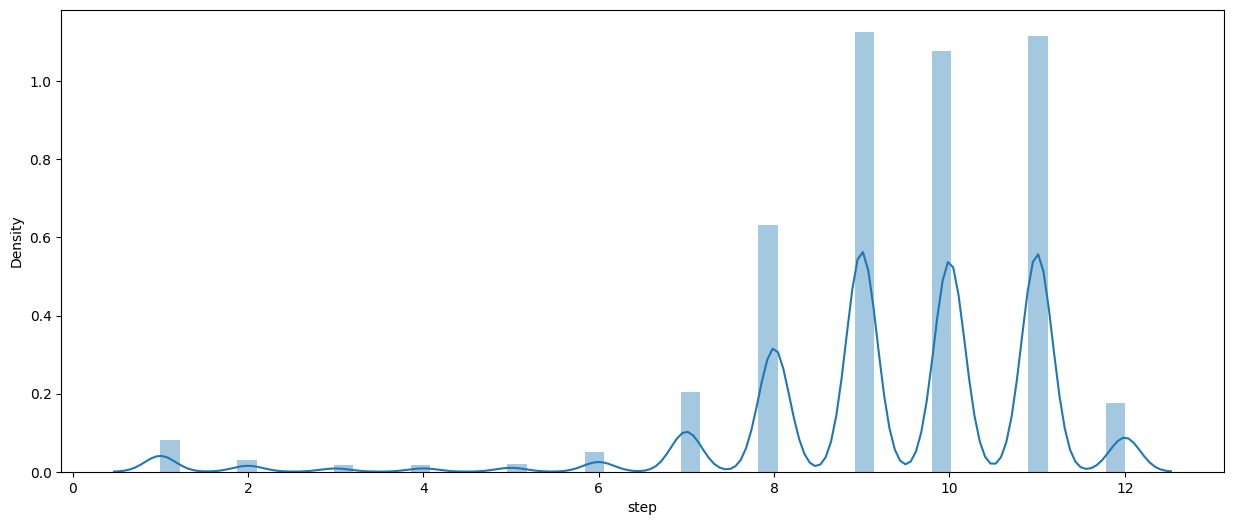

In [18]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)